201911181 이승민 11주차 과제입니다.
- 코드 준비, 문제1의 정답, 문제2의 정답으로 이루어져 있습니다.
- 각각의 정답은 첫 Centroid의 결정 방법에 대해 두 가지의 영역으로 나뉘어져 있습니다.
- 추가로 적지는 않았지만 첫 Centroid를 랜덤으로 설정했을 때에는 Nan, Nan값으로 진행할 수 없는 경우가 있어서 데이터를 열어본 뒤 Centroid를 결정했습니다.

# 코드 준비

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs

In [2]:
def normDist(x1, x2):
    dist = np.linalg.norm(x1 - x2)
    return dist

In [3]:
def cluster(x, k, centroids):
    row, col = x.shape
    clusterAssigned = np.zeros(shape=(row, 2), dtype=float)
    clusterUpdated=True
    iter = 1
    while(clusterUpdated):
        # STEP 1: assign to closer cluster
        for i in range(row):
            minDist = np.inf
            minIndex = -1
            for j in range(k):
                distJI = normDist(centroids[j], x[i])
                if distJI < minDist:
                    minDist = distJI
                    minIndex = j
            clusterAssigned[i] = [minIndex, minDist]
        # STEP 2: update centroids
        _centroids=np.zeros(shape = (k, x.shape[1]), dtype=float)
        for cent in range(k):
            _centroids[cent] = np.mean(x[clusterAssigned[:,0]==cent],axis=0)
        # STEP 3: see if centroids is updated. STOP if NOT updated
        comparison = np.isclose(centroids, _centroids)
        if(comparison.all() == True):
            print('반복 수: {}, 반복 멈춤. Centroids: \n{}'.format(iter, centroids))
            clusterUpdated = False
            return centroids, clusterAssigned
        else:
            print('반복 수: {}, 반복 계속함. Centroids: \n{}'.format(iter, _centroids))
            centroids = _centroids
            iter += 1

# 문제 1의 정답
## (최소한의 정보로 첫 Centroid를 정한 경우)

In [4]:
X, y = make_blobs(n_samples=100, centers = 4, cluster_std=0.6, random_state=0)
모범답안 = np.array([[-1,8],[-1.5,3], [1, 4], [2, 1]], dtype = float)
centroids = np.array([[0, 4],[1,1], [1, 2], [2, 1]], dtype = float)
centroids, clusterAssigned = cluster(X, 4, centroids)

반복 수: 1, 반복 계속함. Centroids: 
[[-0.64580057  5.13951434]
 [ 1.24210088  1.36426475]
 [ 1.06285245  2.32381559]
 [ 2.14946106  0.83965188]]
반복 수: 2, 반복 계속함. Centroids: 
[[-0.83321186  5.56747189]
 [ 1.50356228  1.45032521]
 [ 0.28556777  3.20403725]
 [ 2.21196493  0.7214053 ]]
반복 수: 3, 반복 계속함. Centroids: 
[[-1.16945605  6.95388986]
 [ 1.56184022  1.52219555]
 [-0.16819504  3.60493507]
 [ 2.21394821  0.67376519]]
반복 수: 4, 반복 계속함. Centroids: 
[[-1.22498973  7.6619397 ]
 [ 1.75844579  1.742375  ]
 [-0.33634648  3.71341746]
 [ 2.16499683  0.58300306]]
반복 수: 5, 반복 계속함. Centroids: 
[[-1.27208964  7.74944718]
 [ 1.82737296  1.77808197]
 [-0.33045149  3.74935287]
 [ 2.11445024  0.55681795]]
반복 수: 6, 반복 멈춤. Centroids: 
[[-1.27208964  7.74944718]
 [ 1.82737296  1.77808197]
 [-0.33045149  3.74935287]
 [ 2.11445024  0.55681795]]


## (데이터의 분포를 보고 첫 Centroid를 정한 경우)

In [6]:
X, y = make_blobs(n_samples=100, centers = 4, cluster_std=0.6, random_state=0)
centroids = np.array([[-1,8],[-1.5,3], [1, 4], [2, 1]], dtype = float)
centroids, clusterAssigned = cluster(X, 4, centroids)

반복 수: 1, 반복 계속함. Centroids: 
[[-1.27208964  7.74944718]
 [-1.52704861  3.14337865]
 [ 0.87673717  4.2964758 ]
 [ 1.97918933  0.97920012]]
반복 수: 2, 반복 멈춤. Centroids: 
[[-1.27208964  7.74944718]
 [-1.52704861  3.14337865]
 [ 0.87673717  4.2964758 ]
 [ 1.97918933  0.97920012]]


# 문제 2의 정답 
## (최소한의 정보로 첫 Centroid를 정한 경우)
- 왼쪽이 내가 만든 클러스터, 오른쪽이 주어진 y값

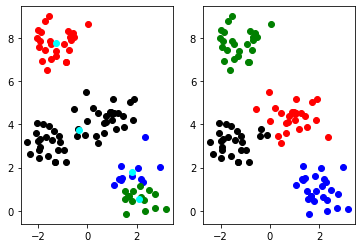

In [5]:
np.c_[clusterAssigned[:,0], y]
%matplotlib inline
colors = ['red', 'blue', 'black', 'green']

plt.subplot(1, 2, 1)
for i in range(4):
    cur = X[clusterAssigned[:, 0] == i]
    plt.scatter(cur[:, 0], cur[:, 1], color = colors[i])
plt.scatter(centroids[:,0], centroids[:,1], color='cyan')
    
plt.subplot(1, 2, 2)
for i in range(4):
    cur = X[y[:] == i]
    plt.scatter(cur[:, 0], cur[:, 1], color = colors[i])
    
plt.show()

## (데이터의 분포를 보고 첫 Centroid를 정한 경우)
- 왼쪽이 내가 만든 클러스터, 오른쪽이 주어진 y값

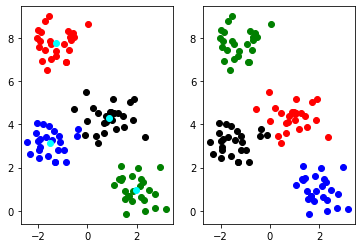

In [7]:
np.c_[clusterAssigned[:,0], y]
%matplotlib inline
colors = ['red', 'blue', 'black', 'green']

plt.subplot(1, 2, 1)
for i in range(4):
    cur = X[clusterAssigned[:, 0] == i]
    plt.scatter(cur[:, 0], cur[:, 1], color = colors[i])
plt.scatter(centroids[:,0], centroids[:,1], color='cyan')
    
plt.subplot(1, 2, 2)
for i in range(4):
    cur = X[y[:] == i]
    plt.scatter(cur[:, 0], cur[:, 1], color = colors[i])
    
plt.show()